In [1]:
from trainer import Trainer
from model.base_model import BaseNet
import pathlib
import utils
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline
%load_ext autoreload
%autoreload 2

# 1 - base model

This is a base model when we just added one dense layer to `resnet50` feature extractor (all layers were freezed). We didn't optimize learning rate (or anything else) and we didn't use any augmentation. We also used `categorical_accuracy` as a metric.

In [2]:
experiment_dir=pathlib.Path('experiments/base_model')

In [25]:
trainer = Trainer(experiment_dir=experiment_dir)

start loading datasets ...
done loading datasets


In [ ]:
trainer.train()

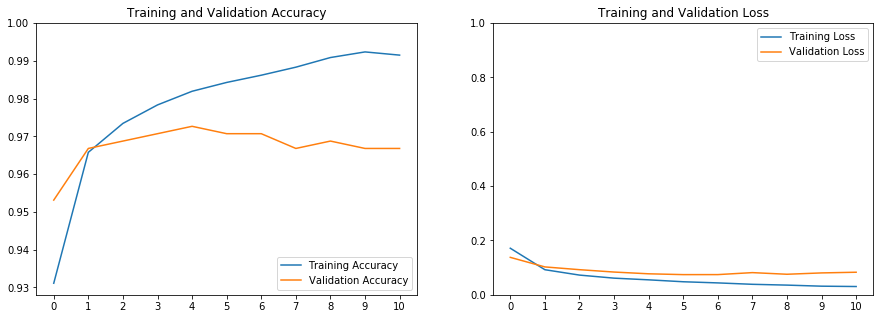

In [18]:
trainer.plot_history()

In [19]:
history_dict = utils.load_history_dict(trainer)

In [20]:
max(history_dict['categorical_accuracy']), max(history_dict['val_categorical_accuracy'])

(0.99234694, 0.97265625)

In [26]:
cm = trainer.get_confusion_matrix()

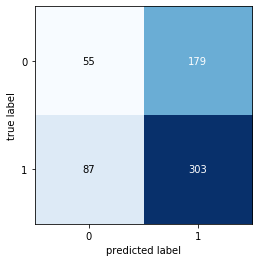

In [27]:
plot_confusion_matrix(cm);

In [29]:
# calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.78
Precision of the model is 0.63


# 2 - model with fine tuning

In [ ]:
tf.keras.backend.clear_session()

In [2]:
experiment_dir=pathlib.Path('experiments/fine_model')

In [3]:
trainer = Trainer(experiment_dir=experiment_dir)

start loading datasets ...
done loading datasets


In [4]:
trainer.train()

Train for 294 steps, validate for 32 steps
Epoch 1/30
293/294 [============================>.] - ETA: 0s - loss: 0.1627 - categorical_accuracy: 0.9332
Epoch 00001: val_loss improved from inf to 1.61269, saving model to experiments/fine_model/weights_val_loss
294/294 [==============================] - 241s 819ms/step - loss: 0.1622 - categorical_accuracy: 0.9335 - val_loss: 1.6127 - val_categorical_accuracy: 0.7402
Epoch 2/30
293/294 [============================>.] - ETA: 0s - loss: 0.1000 - categorical_accuracy: 0.9616
Epoch 00002: val_loss did not improve from 1.61269
294/294 [==============================] - 20s 69ms/step - loss: 0.1000 - categorical_accuracy: 0.9615 - val_loss: 1.9697 - val_categorical_accuracy: 0.7344
Epoch 3/30
293/294 [============================>.] - ETA: 0s - loss: 0.0906 - categorical_accuracy: 0.9663
Epoch 00003: val_loss did not improve from 1.61269
294/294 [==============================] - 20s 69ms/step - loss: 0.0904 - categorical_accuracy: 0.9664 - va

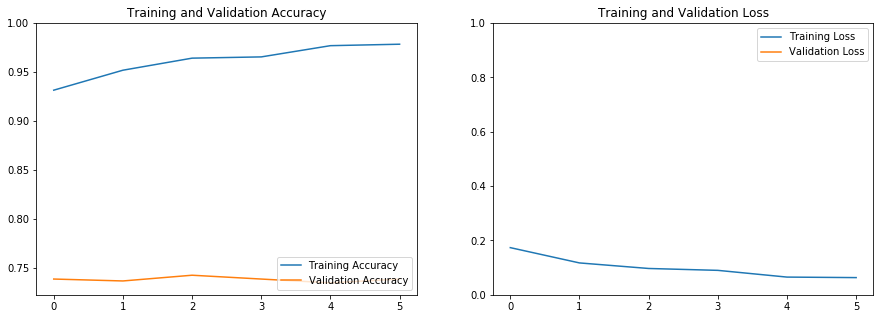

In [5]:
trainer.plot_history()

In [6]:
trainer.unfreeze()

In [ ]:
trainer.train_fine()

Train for 294 steps, validate for 32 steps
Epoch 7/40
177/294 [=================>............] - ETA: 16s - loss: 0.1191 - categorical_accuracy: 0.9615

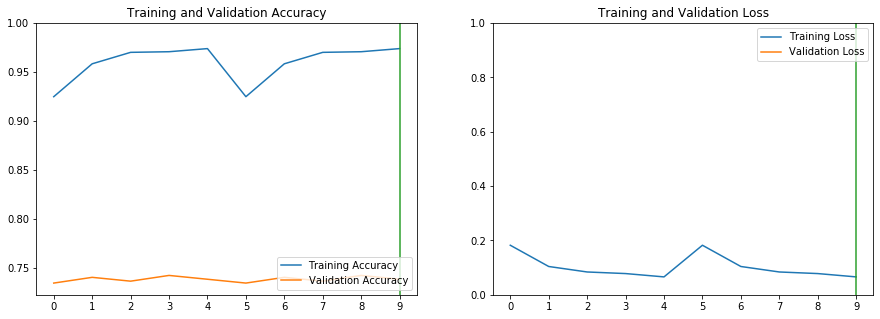

In [8]:
trainer.plot_history(fine=True)

In [9]:
cm = trainer.get_confusion_matrix()

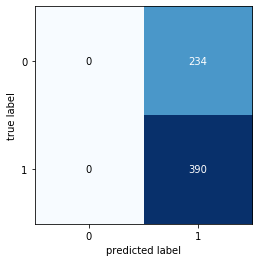

In [10]:
plot_confusion_matrix(cm);

In [11]:
# calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 1.00
Precision of the model is 0.62
